Osnabrück University - A&C: Computational Cognition (Summer Term 2019)

# Exercise Sheet 02: Basic statistics

## Introduction

This week's sheet should be solved and handed in at 14:00 at **Tuesday, April 30, 2019**. If you need help (and Google and other resources were not enough), feel free to contact your tutors. Please push your results to your Github group folder.

In this exercise sheet you will have to work with ```pandas``` and ```seaborn```. ```pandas``` is one of the most preferred and widely used tools in data processing. What’s cool about ```pandas``` is that it takes data (like a CSV or TSV file, or a SQL database) and creates a Python object with rows and columns called 'data frame' that looks very similar to tables in a statistical software (think Excel or SPSS for example). ```pandas``` makes data processing a lot easier in comparison to working with lists and/or dictionaries through for-loops or list comprehension.  
```seaborn``` is a library for making plots. It is based on ```matplotlib``` but offers more functions speicialized for statistical visualization. Also most people agree that ```seaborn``` looks more legit.

Don't forget that you we will also give **2 points** for nice coding style!

## Assignment 0: Peer review for sheet 01 [3 pts]

Beginning this week you will have to make a peer review of the other groups' solutions. Each group reviews the solutions of two other groups and give points according to the given point distribution considering the correctness of the solution. For this reviews the tutors will give you up to 3 points each week.

| * |Group 1|Group 2|Group 3|Group 4|Group 5|Group 6|Group 7|Group 8|Group 9|Group 10|Group 11|
| ------- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ------ | ------ |
| check solutions of group: | 10, 7 | 4, 9  | 1, 4  | 11, 1 | 8, 11 | 5, 3  | 9, 10 | 6, 5  | 3, 2  | 2, 8   | 7, 6   |

You should open an issue in repositories of groups you have to check. The title of the issue should be your group name (e.g."Group 1"). Comments on what was good and bad, how much points they get etc.  
Refer to https://guides.github.com/features/issues/ to learn more about issues.

## Assignment 1: Dataframes [4 pts]

In [1]:
# import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

```matplotlib``` and ```seaborn``` should already be installed in your environment. If not please run:
```sh
pip install seaborn
```

### a) Importing a csv file [2 pts]

Import the csv files of all subjects into one dataframe. Make sure that each row has a unique index. You might want to take a look at what ***pandas.concat*** does.<br>
Extra fun: Display the output of the dataframe using the ***pandas.set_option*** function to display the data in a well-arranged way. Play a little bit around with the settings that you are allowed to change.<br>
Save ```df_concatenated```.


In [2]:
import glob
import os

PATH = os.getcwd()+ "/Data"
all_files = glob.glob(os.path.join(PATH, "*.csv"))     # advisable to use os.path.join as this makes concatenation OS independent
                                                       # http://www.oipapio.com/question-88634    
df_concatenated = pd.concat([pd.read_csv(file, index_col = 0) for file in all_files])

# use pd.set_option here to display in a nice way
pd.set_option().max_rows(3)
print(df_concatenated)

# save concatenated dataframe
#WHY error
DATAPATH = os.getcwd() + '/Processed/data_concatenated.csv'
df_concatenated.to_csv(DATAPATH, index = False)

ValueError: Must provide an even number of non-keyword arguments

### b) Working with dataframes [2 pts]

- Add a column called "congruence" to ```df_concatenated```. The column should have a value *True* if "StimulusType" and "reponse" matches. Otherwise the column should have a value *False*.

- Create a new dataframe which has "SubjectID","StiumulusType","RT" and "congruence" as a column. For each combination of "SubjectID" and "StimulusType" (e.g. "7001" and "0") compute the average RT and congruence level.

- When computing the average RT, omit all reaction times which are 0 as these will manipulate the mean.

- Rename "congruence" as "accuracy" and save the dataframe as a csv file. 

In [3]:
# add a column "congruence"
df_concatenated['congruence'] = df_concatenated['StimulusType'] == df_concatenated['response']

# create a new dataframe with averaged data

df_concatenated_avg = pd.DataFrame()
df_concatenated_avg['accuracy'] = df_concatenated.groupby(['SubjectID', 'StimulusType'])['congruence'].mean()
df_concatenated_avg['RT'] = df_concatenated[df_concatenated['RT']!= 0].groupby(['SubjectID', 'StimulusType'])['RT'].mean()
df_concatenated_avg = df_concatenated_avg.reset_index()
print(df_concatenated_avg)

DATAPATH = os.getcwd() + '/Processed/data_concatenated_averaged.csv'
df_concatenated_avg.to_csv(DATAPATH, index = False)

   SubjectID  StimulusType  response   RT  congruence
0          0             1         1  591        True
1          0             1         1  527        True
2          0             1         1  331        True
3          0             0         0    0        True
4          0             1         1  363        True
                               RT  accuracy
SubjectID StimulusType                     
0         0              1.252508  0.028333
          1             40.891304  0.133333
1         0              0.555184  0.031667
          1             40.983278  0.133333
2         0              2.289298  0.025000
          1             49.550167  0.115000
3         0              4.387960  0.020000
          1             52.600334  0.120000
4         0              1.553512  0.028333
          1             51.178930  0.128333
5         0              2.147157  0.026667
          1             55.295987  0.130000


## Assignment 2: Statistical plotting [6 pts]

### a) Boxplot and Violinplot [2 pts]

Plot the RT of each trial for all subjects as a stripplot and a boxplot on top of each other. Do the same with a striplot and a violinplot. Plot go trials as green dots and no-go trails as red dots. Reminder: don't forget to mask the data where RT=0. Make sure that the legends are informative (Don't display duplicated legends).

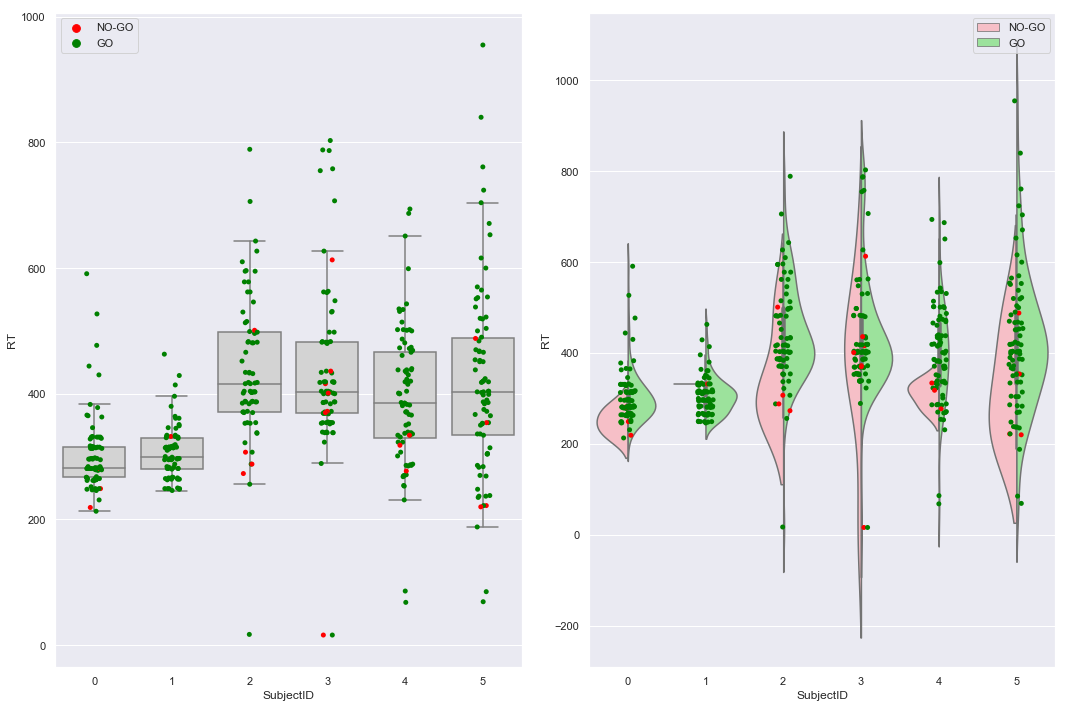

In [112]:
# read data
data_concat = pd.read_csv(os.getcwd() + "/Processed/data_concatenated.csv")

# create two axes
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(15,10))

# mask RT==0
df_concatenated=df_concatenated[df_concatenated['RT'] != 0]


# first subplot with stripplot and boxplot

sns.boxplot(x= 'SubjectID',data=df_concatenated,y='RT', ax=axes[0],showfliers=False,palette= ["lightgrey"],)
strip_1 = sns.stripplot(x= 'SubjectID', y='RT',hue='StimulusType',data=df_concatenated, ax=axes[0],jitter=True, palette=["red", "green"])


# second subplot with stripplot and violinplot

violin = sns.violinplot(x= 'SubjectID',hue='StimulusType',split= True, data=df_concatenated,y='RT', ax=axes[1],legend_out=True,palette=["lightpink","lightgreen"])
sns.stripplot(x= 'SubjectID',data=df_concatenated,y='RT',hue='StimulusType', ax=axes[1], jitter=True,palette=["red", "green"])

# handling legends
#informative legends for the scatterplot
handles, _ = strip_1.get_legend_handles_labels()
strip_1.legend(handles, ["NO-GO", "GO"])
#informative legends for the violinplot, delted duplicated legend:legends of the scatter
handles, _ = violin.get_legend_handles_labels()
violin.legend(handles, ["NO-GO", "GO"])


# TODO
fig.tight_layout()

### b) Violinplot combining all data of all groups [3 pts]

- Make a dataframe consisting of all data across groups. You already did this in 1.a). At the end this dataframe you should have 8 * 11 * 100 rows.

- Every group has used their ID convention. Make sure that every data point follows this SubjectID system: group number + "00" + subject number.  
e.g) 3002 for the second subject of the third group.

- Compute average RT and accuaracy for each subject in the big dataframe you just created. You already did this in 1.b). At the end this dataframe will have 8 * 11 rows.

- On the first column plot average RT and accuracy for 8 subjects from your group's data. Use violinplot and split go/no-go conditions.

- On the second column plot average RT and accuracy for 80 subjects from all data. Use violinplot and split go/no-go conditions.

- Do you see any difference between the first column and the second column? What does this tell us about the central limit theorem (CLT) ?

     SubjectID  StimulusType  accuracy          RT
0            1             0    0.9500  445.000000
1            1             1    1.0000  449.237500
2           11             0    1.0000         NaN
3           11             1    1.0000  352.837500
4         1001             0    0.9500  392.000000
5         1001             1    1.0000  408.762500
6         1002             0    0.8500  256.333333
7         1002             1    1.0000  335.450000
8         1003             0    0.8000  258.000000
9         1003             1    0.9875  282.354430
10        1004             0    0.9000  372.500000
11        1004             1    1.0000  377.650000
12        1005             0    0.7500  269.600000
13        1005             1    1.0000  380.562500
14        1006             0    0.8500  265.333333
15        1006             1    1.0000  342.362500
16        1007             0    0.9000  293.500000
17        1007             1    1.0000  349.487500
18        1008             0   

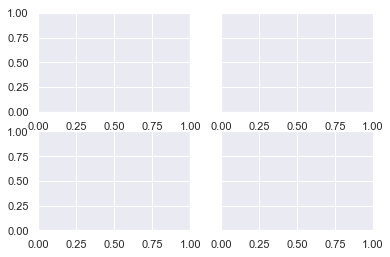

In [158]:
# again create a concatenated dataframe over all (averaged) groups.
# Don't forget to modify the Subject ID

# get paths
PATH_dir = os.getcwd()+ "/Experimental_Data"
all_dir = [os.path.join(PATH_dir, dir) for dir in os.listdir(PATH_dir) if os.path.isdir(os.path.join(PATH_dir, dir))]

#concatenate csv's to a complete dataframe
#cleans subID incommonsurability with adding column: correct_name
fulllist = []
for dir in all_dir:
    csv_files = [os.path.join(dir, csv) for csv in os.listdir(dir) if os.path.isfile(os.path.join(dir, csv)) and csv.endswith('.csv')]
    for sub in csv_files:
        csv = pd.read_csv(sub)
        correct_name = int(''.join(filter(str.isdigit, os.path.basename(sub))))
        csv['correct_name'] = correct_name
        fulllist.append(csv)

fullframe = pd.concat(fulllist)

#replace Sub-ID due to incommonsurability
fullframe['SubjectID']= fullframe['correct_name']            

#get accuracy
fullframe['congruence'] = (fullframe['StimulusType'] == fullframe['response'])

#get averages
fullframe_avg = pd.DataFrame()

fullframe_avg['accuracy'] = fullframe.groupby(['SubjectID', 'StimulusType'])['congruence'].mean()
fullframe_avg['RT'] = fullframe[fullframe['RT']!= 0].groupby(['SubjectID', 'StimulusType'])['RT'].mean()
fullframe_avg = fullframe_avg.reset_index()
print(fullframe_avg)


# Now it's time to plot your results
figs, axes = plt.subplots(nrows=2, ncols=2, sharey="row")
#####


# violin plot for your group's data
# TODO

# violin plot of all group's data
# TODO


Compare two datasets and relate it with CLT. Write your opinion here.

### c) Scatterplot [1 pts]

Make a scatterplot comparing RT and accuracy. Do you see some correlation?

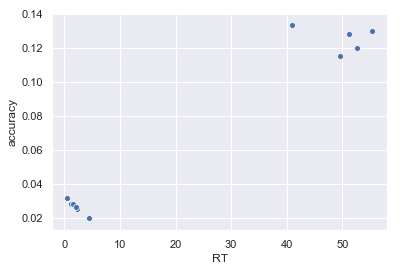

In [124]:
# TODO
sns.scatterplot(data=df_concatenated_avg,x='RT',y='accuracy')